In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import model_selection, metrics
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import seaborn as sns
import math
import keras
from time import time
import glob
from keras.callbacks import TensorBoard


import os
print(os.listdir("."))

/home/lazukav/anaconda3/lib/python3.5/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


['.ipynb_checkpoints', 'test.csv', 'train.csv', 'mnist.ipynb', 'Untitled1.ipynb', 'model0.csv', 'Untitled.ipynb']


Using TensorFlow backend.


In [2]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [3]:
def load_data(train_path='train.csv', test_path='test.csv'):
    train = pd.DataFrame.from_csv(train_path, index_col=None)
    test = pd.DataFrame.from_csv(test_path, index_col=None)
              
    return train, test

In [4]:
train, test = load_data()

/home/lazukav/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/home/lazukav/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
train_X = train.drop("label", axis=1)
train_y = train["label"]

In [6]:
train_X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

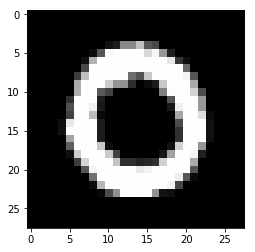

In [7]:
plt.imshow(train_X.iloc[1].values.reshape((28, 28)), cmap='gray')
plt.show()

In [8]:
train_X.iloc[1].unique()

array([  0,  18,  30, 137, 192,  86,  72,   1,  13, 250, 254, 217, 246,
       151,  32,  16, 179, 231,  54,  15, 104,  61, 191, 109,  83, 199,
       243,  85, 172, 202, 147,  45,  11,  29, 200, 171, 174,  89,  67,
       128, 252, 212,  76,  47, 153,  80, 240,  24,  25,  64, 186,   7,
       166, 224,  12,  14, 232,  75,  17,  48,   2, 163,  94, 209, 150,
       206,  66,  21, 161, 245,  31,  60, 194,  34,  41, 233, 114, 239,
       182,  70,   8, 146, 255,  19])

In [9]:
train_X = train_X.div(255, axis=0).fillna(0)
test = test.div(255, axis=0).fillna(0)

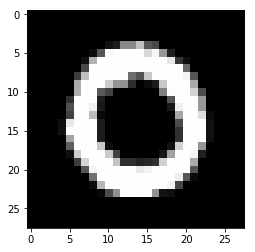

In [10]:
plt.imshow(train_X.iloc[1].values.reshape((28,28)), cmap='gray')
plt.show()

In [11]:
train_X.iloc[1].unique()

array([0.        , 0.07058824, 0.11764706, 0.5372549 , 0.75294118,
       0.3372549 , 0.28235294, 0.00392157, 0.05098039, 0.98039216,
       0.99607843, 0.85098039, 0.96470588, 0.59215686, 0.1254902 ,
       0.0627451 , 0.70196078, 0.90588235, 0.21176471, 0.05882353,
       0.40784314, 0.23921569, 0.74901961, 0.42745098, 0.3254902 ,
       0.78039216, 0.95294118, 0.33333333, 0.6745098 , 0.79215686,
       0.57647059, 0.17647059, 0.04313725, 0.11372549, 0.78431373,
       0.67058824, 0.68235294, 0.34901961, 0.2627451 , 0.50196078,
       0.98823529, 0.83137255, 0.29803922, 0.18431373, 0.6       ,
       0.31372549, 0.94117647, 0.09411765, 0.09803922, 0.25098039,
       0.72941176, 0.02745098, 0.65098039, 0.87843137, 0.04705882,
       0.05490196, 0.90980392, 0.29411765, 0.06666667, 0.18823529,
       0.00784314, 0.63921569, 0.36862745, 0.81960784, 0.58823529,
       0.80784314, 0.25882353, 0.08235294, 0.63137255, 0.96078431,
       0.12156863, 0.23529412, 0.76078431, 0.13333333, 0.16078

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_X, train_y, test_size=0.2, shuffle=None)

# DNN (0.90457)

In [13]:
def train_classification_model(
    learning_rate,
    steps,
    batch_size,
    X_train,
    y_train,
    X_test,
    y_test,
    cols,
    m_dir,
    periods):

    steps_per_period = steps / periods  

    training_input_fn = tf.estimator.inputs.pandas_input_fn(
        x=X_train,
        y=y_train,
        shuffle=True,
    )

    ptraining_input_fn = tf.estimator.inputs.pandas_input_fn(
        x=X_train,
        y=y_train,
        num_epochs=1,
        shuffle=False,
    )

    validation_input_fn = tf.estimator.inputs.pandas_input_fn(
        x=X_test,
        y=y_test,
        num_epochs=1,
        shuffle=False 
    )

    my_optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    classifier = tf.estimator.DNNClassifier(
        feature_columns=cols,
        n_classes=10,
        optimizer=my_optimizer,
        hidden_units=[64, 128, 64],
        model_dir=m_dir
    )

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("LogLoss error (on validation data):")
    training_errors = []
    validation_errors = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        classifier.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
        classifier.evaluate(input_fn=validation_input_fn)
        # Take a break and compute probabilities.
        training_predictions = list(classifier.predict(input_fn=ptraining_input_fn))
        training_probabilities = np.array([item['probabilities'] for item in training_predictions])
        training_pred_class_id = np.array([item['class_ids'][0] for item in training_predictions])
        training_pred_one_hot = tf.keras.utils.to_categorical(training_pred_class_id,10)

        validation_predictions = list(classifier.predict(input_fn=validation_input_fn))
        validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])    
        validation_pred_class_id = np.array([item['class_ids'][0] for item in validation_predictions])
        validation_pred_one_hot = tf.keras.utils.to_categorical(validation_pred_class_id,10)    
        # Compute training and validation errors.
        training_log_loss = metrics.log_loss(y_train, training_pred_one_hot)
        validation_log_loss = metrics.log_loss(y_test, validation_pred_one_hot)
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, validation_log_loss))
        # Add the loss metrics from this period to our list.
        training_errors.append(training_log_loss)
        validation_errors.append(validation_log_loss)
    print("Model training finished.")
    # Remove event files to save disk space.
    _ = map(os.remove, glob.glob(os.path.join(classifier.model_dir, 'events.out.tfevents*')))

    # Calculate final predictions (not probabilities, as above).
    final_predictions = classifier.predict(input_fn=validation_input_fn)
    final_predictions = np.array([item['class_ids'][0] for item in final_predictions])

    accuracy = metrics.accuracy_score(y_test, final_predictions)
    print("Final accuracy (on validation data): %0.2f" % accuracy)

    # Output a graph of loss metrics over periods.
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.plot(training_errors, label="training")
    plt.plot(validation_errors, label="validation")
    plt.legend()
    plt.show()

    # Output a plot of the confusion matrix.
    cm = metrics.confusion_matrix(y_test, final_predictions)
    # Normalize the confusion matrix by row (i.e by the number of samples
    # in each class).
    cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(cm_normalized, cmap="bone_r")
    ax.set_aspect(1)
    plt.title("Confusion matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

    return classifier

In [14]:
cols = []
cols = [tf.feature_column.numeric_column(i) for i in train_X.columns.values]


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_eval_distribute': None, '_num_ps_replicas': 0, '_service': None, '_experimental_distribute': None, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_device_fn': None, '_model_dir': '/tmp/model0', '_tf_random_seed': None, '_global_id_in_cluster': 0, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_train_distribute': None, '_master': '', '_task_type': 'worker', '_num_worker_replicas': 1, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec o

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 314: /tmp/model0/model.ckpt-314
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/model0/model.ckpt-314
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/model0/model.ckpt-314
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
  period 02 : 3.31
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/model0/model.ckpt-314
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 314 into /tmp/m

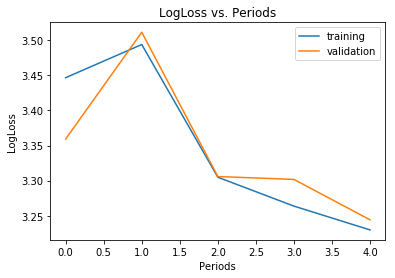

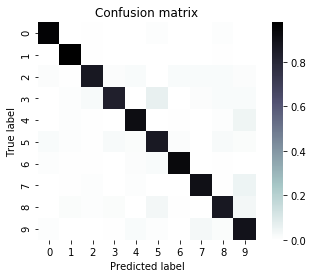

In [15]:
model0 = train_classification_model(
    learning_rate=0.005,
    steps=100,
    batch_size=20,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    cols=cols,
    m_dir='/tmp/model0',
    periods=5)

In [16]:
scores0 = model0.predict(input_fn=tf.estimator.inputs.pandas_input_fn(x=test,
                                                                      num_epochs=1,
                                                                      shuffle=False))

res = []
for i, p in enumerate(scores0):
#     print(i + 1, p['class_ids'][0])
    res.append([i + 1, p['class_ids'][0]])   

#to df then to series and save to file
result = pd.DataFrame(res, columns=['ImageId', 'Label'])
result.to_csv('model0.csv', index=None)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/model0/model.ckpt-354
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [17]:
class TrainValTensorBoard(TensorBoard):
    def __init__(self, log_dir='./logs', **kwargs):
        # Make the original `TensorBoard` log to a subdirectory 'training'
        training_log_dir = os.path.join(log_dir, 'training')
        super(TrainValTensorBoard, self).__init__(training_log_dir, **kwargs)

        # Log the validation metrics to a separate subdirectory
        self.val_log_dir = os.path.join(log_dir, 'validation')

    def set_model(self, model):
        # Setup writer for validation metrics
        self.val_writer = tf.summary.FileWriter(self.val_log_dir)
        super(TrainValTensorBoard, self).set_model(model)

    def on_epoch_end(self, epoch, logs=None):
        # Pop the validation logs and handle them separately with
        # `self.val_writer`. Also rename the keys so that they can
        # be plotted on the same figure with the training metrics
        logs = logs or {}
        val_logs = {k.replace('val_', ''): v for k, v in logs.items() if k.startswith('val_')}
        for name, value in val_logs.items():
            summary = tf.Summary()
            summary_value = summary.value.add()
            summary_value.simple_value = value.item()
            summary_value.tag = name
            self.val_writer.add_summary(summary, epoch)
        self.val_writer.flush()

        # Pass the remaining logs to `TensorBoard.on_epoch_end`
        logs = {k: v for k, v in logs.items() if not k.startswith('val_')}
        super(TrainValTensorBoard, self).on_epoch_end(epoch, logs)

    def on_train_end(self, logs=None):
        super(TrainValTensorBoard, self).on_train_end(logs)
        self.val_writer.close()

# Sequential in Keras (0.98514)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input

In [19]:
batch_size = 128
num_classes = 10
epochs = 5 # 12
# filters = 4
pool_size = 2
kernel_size = 3

In [20]:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

In [21]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [22]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [23]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
# input_shape

In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# tensorboard = keras.callbacks.TensorBoard(log_dir="/tmp/{}".format(time()))

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[TrainValTensorBoard(write_graph=False,log_dir="/tmp/{}".format(time()))])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 43s 1ms/step - loss: 0.3656 - acc: 0.8860 - val_loss: 0.0938 - val_acc: 0.9725
Epoch 2/5
33600/33600 [==============================] - 43s 1ms/step - loss: 0.1150 - acc: 0.9663 - val_loss: 0.0625 - val_acc: 0.9799
Epoch 3/5
33600/33600 [==============================] - 43s 1ms/step - loss: 0.0824 - acc: 0.9755 - val_loss: 0.0502 - val_acc: 0.9849
Epoch 4/5
33600/33600 [==============================] - 43s 1ms/step - loss: 0.0642 - acc: 0.9802 - val_loss: 0.0420 - val_acc: 0.9865
Epoch 5/5
33600/33600 [==============================] - 44s 1ms/step - loss: 0.0544 - acc: 0.9832 - val_loss: 0.0396 - val_acc: 0.9870
Test loss: 0.03964149636748646
Test accuracy: 0.9870238095238095


In [37]:
scores1 = model.predict_classes(test.values.reshape(test.shape[0], 28, 28, 1))

res = []
for i, p in enumerate(scores1):
#     print(i + 1, p['class_ids'][0])
    res.append([i + 1, p])   

#to df then to series and save to file
result = pd.DataFrame(res, columns=['ImageId', 'Label'])
result.to_csv('model1.csv', index=None)

# Functional API (0.98785)

In [38]:
from keras.models import Model

In [39]:
x_in = Input(shape=X_test.shape[1:])
x = Conv2D(32, (3, 3),
                  activation='relu', padding='valid')(x_in)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes,
                           activation='softmax',
                           name='x_train_out')(x)

model2 = Model(inputs=x_in, outputs=predictions)
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# tensorboard = keras.callbacks.TensorBoard(log_dir="/tmp/{}".format(time()))

model2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[TrainValTensorBoard(write_graph=False,log_dir="/tmp/{}".format(time()))])
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 15s 443us/step - loss: 0.3117 - acc: 0.9026 - val_loss: 0.0877 - val_acc: 0.9715
Epoch 2/5
33600/33600 [==============================] - 15s 434us/step - loss: 0.0843 - acc: 0.9736 - val_loss: 0.0586 - val_acc: 0.9820
Epoch 3/5
33600/33600 [==============================] - 15s 432us/step - loss: 0.0589 - acc: 0.9811 - val_loss: 0.0470 - val_acc: 0.9849
Epoch 4/5
33600/33600 [==============================] - 15s 434us/step - loss: 0.0447 - acc: 0.9861 - val_loss: 0.0464 - val_acc: 0.9858
Epoch 5/5
33600/33600 [==============================] - 15s 434us/step - loss: 0.0382 - acc: 0.9884 - val_loss: 0.0386 - val_acc: 0.9870
Test loss: 0.038602769227540454
Test accuracy: 0.9870238095238095


In [42]:
scores2 = model2.predict(test.values.reshape(test.shape[0], 28, 28, 1))

res = []
for i, p in enumerate(scores2.argmax(axis=-1)):
#     print(i + 1, p['class_ids'][0])
    res.append([i + 1, p])   

#to df then to series and save to file
result = pd.DataFrame(res, columns=['ImageId', 'Label'])
result.to_csv('model2.csv', index=None)